<a href="https://colab.research.google.com/github/pratikjori20/Netflix-movies-TV-Shows-Clustring-ML-unsupervised/blob/main/individual_notebook_capstone_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<B>Netflix Movies and TV Shows Clustering

# Problem statement

# Variable description

In [51]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import warnings
warnings.filterwarnings('ignore')

In [2]:
# mount the  drive on colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# read the path of csv file

path = '/content/drive/MyDrive/ML Unsupervised /NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

df = pd.read_csv(path)

In [6]:
# first look of dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
# no of rows and columns in dataset

df.shape

(7787, 12)

In [8]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
# checking duplicate values
df_duplicated = df[df.duplicated()]
print("Let's see which columns contains dupilcate values rows")
df_duplicated

Let's see which columns contains dupilcate values rows


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


*   There is no duplicated values present in the dataset.



In [10]:
# missing/ Null values count

null = pd.DataFrame({'No of Total values': df.shape[0] , 'No of NaN Values': df.isnull().sum(),
                     '% of NaN values': round((df.isnull().sum()/df.shape[0])*100, 2)})
null.sort_values('No of NaN Values', ascending = False)

,No of Total values,No of NaN Values,% of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00




*   director column has highest 30.68% NaN values
*   cast ccolumn has 9.22% NaN values
*   country, date_added, rating columns also containing NaN values




In [11]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
# ploting null values present in dataset

nan = df.isna()
nan.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

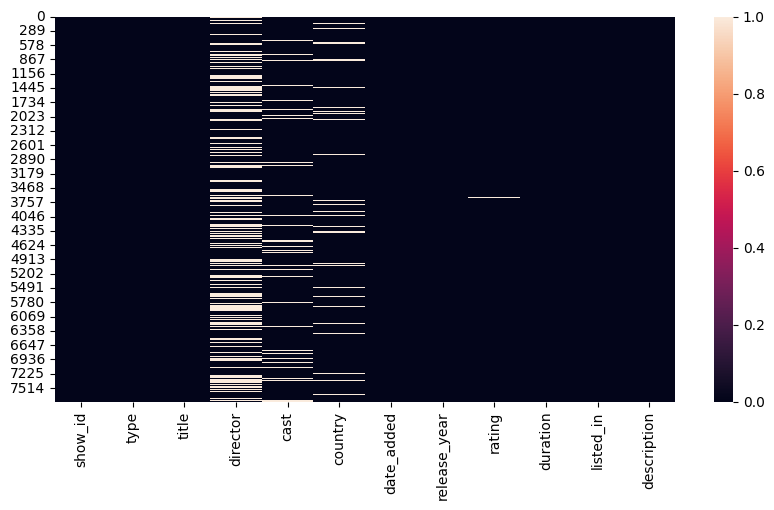

In [13]:
plt.figure(figsize = (10,5))
sns.heatmap(nan)

In [14]:
# columns in dataset

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
# describe the dataset

df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


*  as we see in the dataframe that only 'release_year' column contains the numeric data so it showing only that columns describtion.

In [16]:
df.describe(include= 'O').T

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


In [17]:
# checking the unique values for the all varaibles

df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

* there is only 2 unique values in 'type' columns let's check it.

In [18]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

# Data Wrangling

In [19]:
# handling thae missing values
df['director'].fillna('unknown', inplace =True)
df['cast'].fillna('unknown', inplace =True)
df['country'].fillna('unknown', inplace =True)
#df['date_added'].fillna('unknown', inplace =True)
df['rating'].fillna('unknown', inplace =True)

In [20]:
# creating dataset copy
df_copy = df.copy()

In [21]:
# converting date_added column to datetime 
df_copy['date_added'] = pd.to_datetime(df_copy['date_added'])

In [22]:
df_copy ['listed_in'] = df_copy.listed_in.apply(lambda row: row.split(', '))
df_copy.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

# Exploratory Data Analysis

<Figure size 1500x900 with 0 Axes>

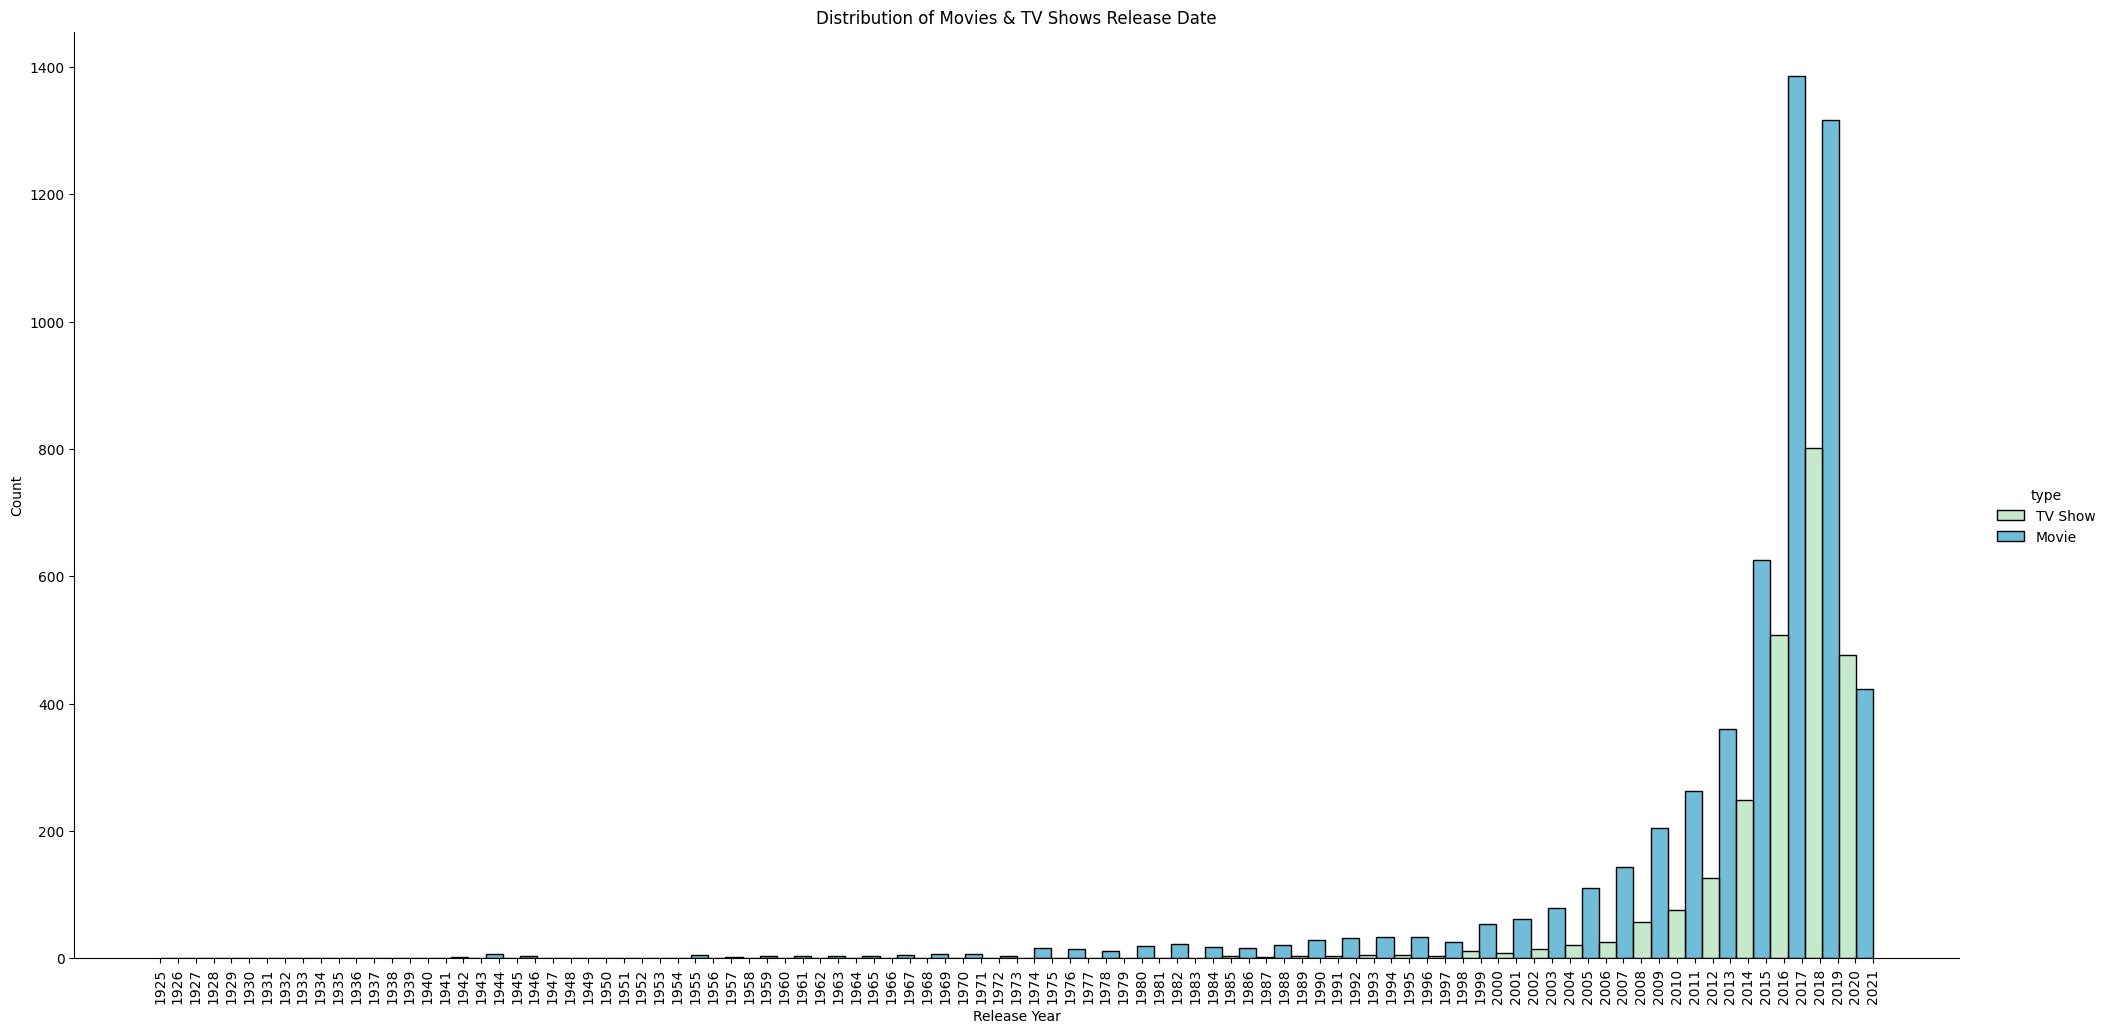

In [23]:
# histogram for release dates of movies and tv shows
ticks=np.arange(df_copy.release_year.min(), df_copy.release_year.max()+1,1)
plt.figure(figsize=(15,9))
sns.displot(x='release_year', data= df_copy, kind='hist', height=10, aspect=2, bins=50, hue='type', multiple='dodge', palette='GnBu')
plt.xticks(ticks, rotation=90)
plt.xlabel('Release Year')
plt.title('Distribution of Movies & TV Shows Release Date')
plt.show();

* Most of the movies were released on the platform after 2012
* Most of the TV Shows were released on the platform after 2015
* Highest number of Movies and TV Shows were released on the platform on 2017 year

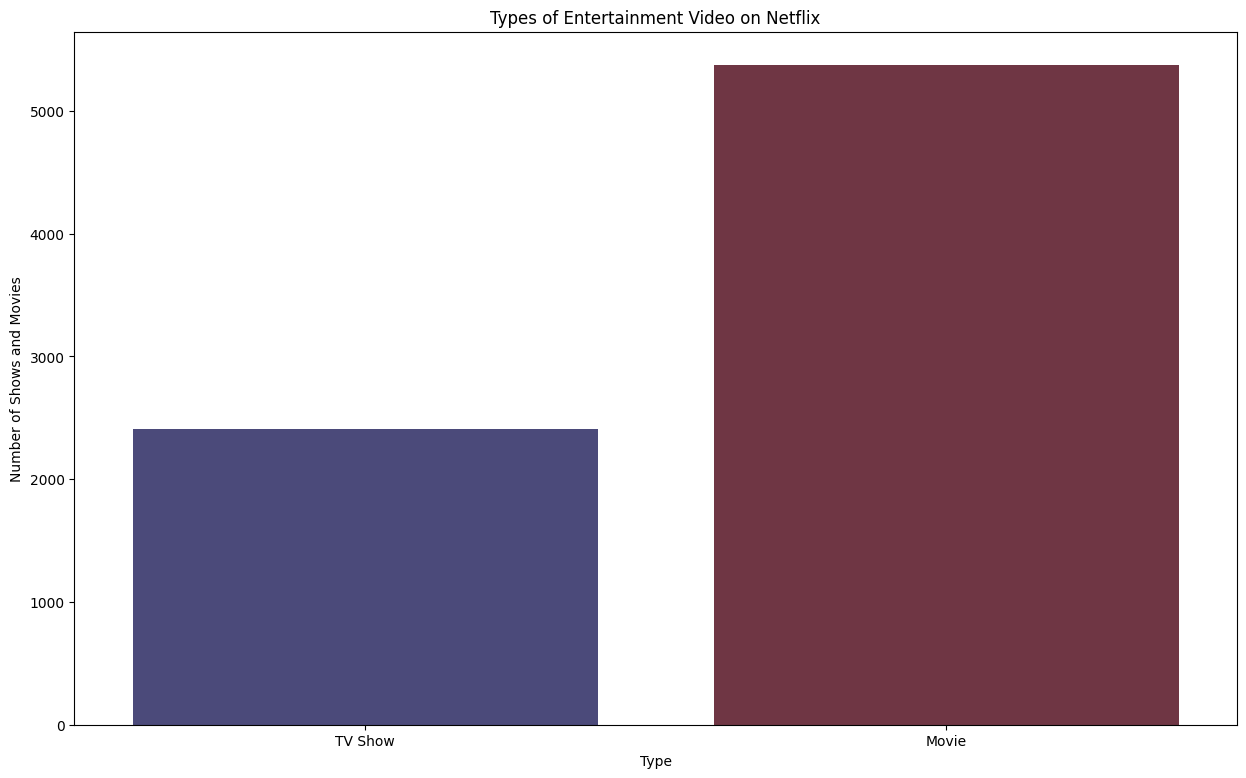

In [24]:
# Types of video present on Netflix

plt.figure(figsize=(15,9))
sns.countplot(x=df_copy['type'], data=df_copy, palette='icefire')
plt.xlabel('Type')
plt.ylabel('Number of Shows and Movies')
plt.title('Types of Entertainment Video on Netflix')
plt.show();



*   There is only half TV shows present than the Movies on Netflix

In [25]:
p = df_copy['type'].value_counts()
p

Movie      5377
TV Show    2410
Name: type, dtype: int64

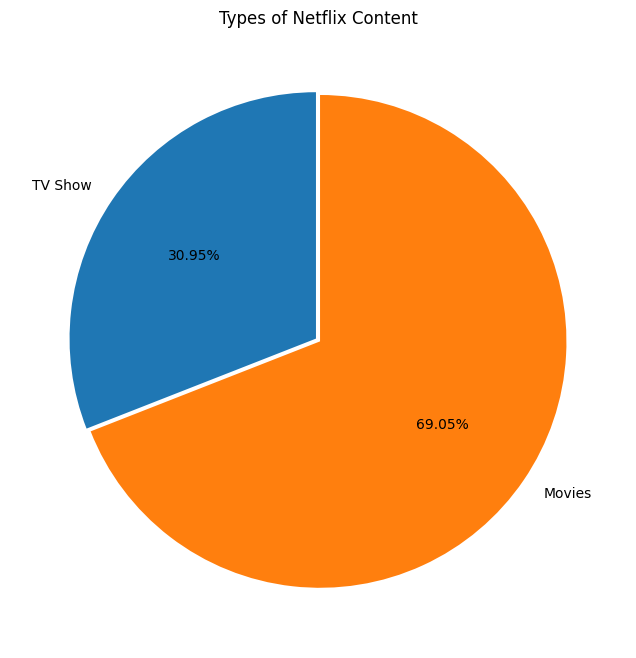

In [26]:
# ploting the pie chart for type feature

plt.figure(figsize=(14,8))
labels=['TV Show', 'Movies']
plt.pie(p.sort_values(), explode=[0.01,0.01], labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Types of Netflix Content')
plt.show();

* there is around 69% videos present that are movies  and remaining 31% is as TV Show.

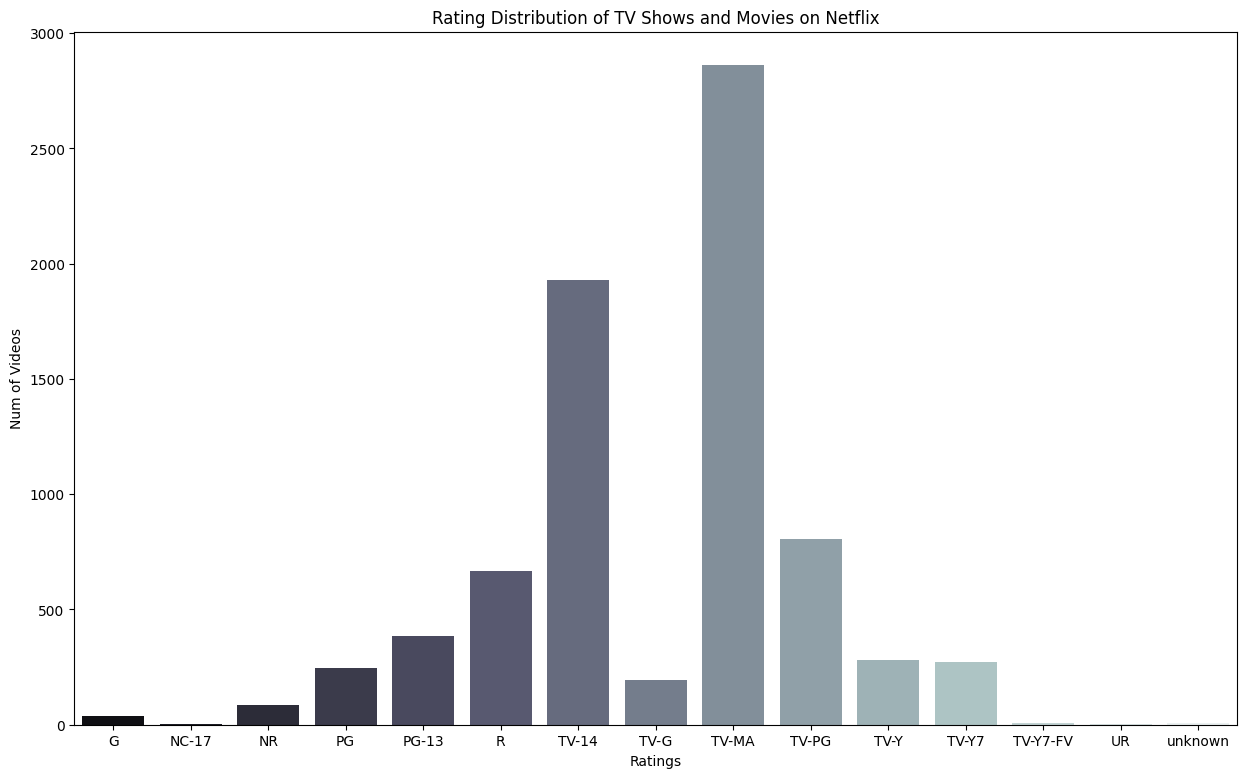

In [27]:
# rating on the netflix

plt.figure(figsize=(15,9))
a = df_copy.groupby('rating').agg({'show_id':'count'}).reset_index()
sns.barplot(x=a['rating'], y=a['show_id'], palette='bone')
plt.xlabel('Ratings')
plt.ylabel('Num of Videos')
plt.title('Rating Distribution of TV Shows and Movies on Netflix')
plt.show();

* Most of the content on Netflix is rated for above 14 year old audiance.

In [28]:
def convert_season_min(value):
  no_avg_episode = 5
  if 'Seasons' in value:
    value = value.replace('Seasons', '')
    value = value.replace(' ','')
    total_seasons = int(value)
    each_seas_min = (no_avg_episode * 55)
    total_min = (total_seasons * each_seas_min)
    return total_min

  elif 'Season' in value:
    value = value.replace('Season', '')
    value = value.replace(' ', '')
    total_min = (no_avg_episode * 55)
    return total_min


In [29]:
convert_season_min('2 Seasons')

550

In [30]:
def duration_in_min():
  ''' This function will convert 
  all the durations in to minute'''

  # replacing the min with null string
  df_copy['duration'] = df_copy.duration.str.replace('min', '')
  time_list = []     # it contain all the values
  for time in df_copy.duration.values:
    if 'Season' in time:
      time = convert_season_min(time)
    else:
      time = time.replace(' ', '')
    time_list.append(time)

  time_list = [int(Time) for Time in time_list]

  df_copy.duration = time_list

In [31]:
df_copy.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,9 min,182 min,224 min,233 min,196 min,191 min
duration,1608,382,184,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [32]:
duration_in_min()

In [33]:
df_copy.duration.value_counts().to_frame().T

,275,550,825,90,93,94,91,95,92,97,...,193,13,214,8,9,182,224,233,196,191
duration,1608,382,184,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


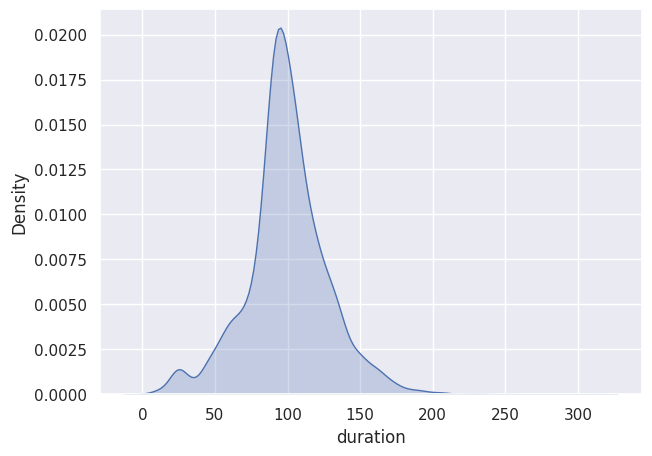

In [34]:
# ploting the duration time for the movies
sns.set(style='darkgrid')
plt.figure(figsize=(7,5))
sns.kdeplot(data= df_copy.duration[df_copy['type']=='Movie'], shade=True)
plt.show();

* The highest duration is about 70 to 120 min fir movies

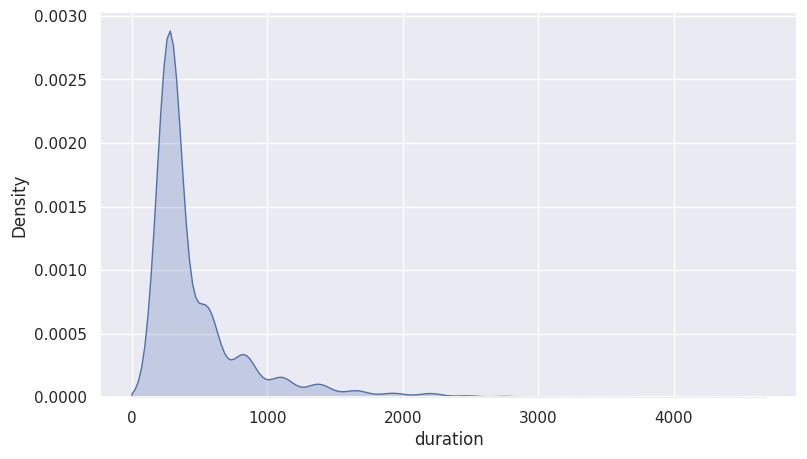

In [35]:
# ploting the duration time for the TV Shows
sns.set(style='darkgrid')
plt.figure(figsize=(9,5))
sns.kdeplot(data= df_copy.duration[df_copy['type']=='TV Show'], shade=True)
plt.show();

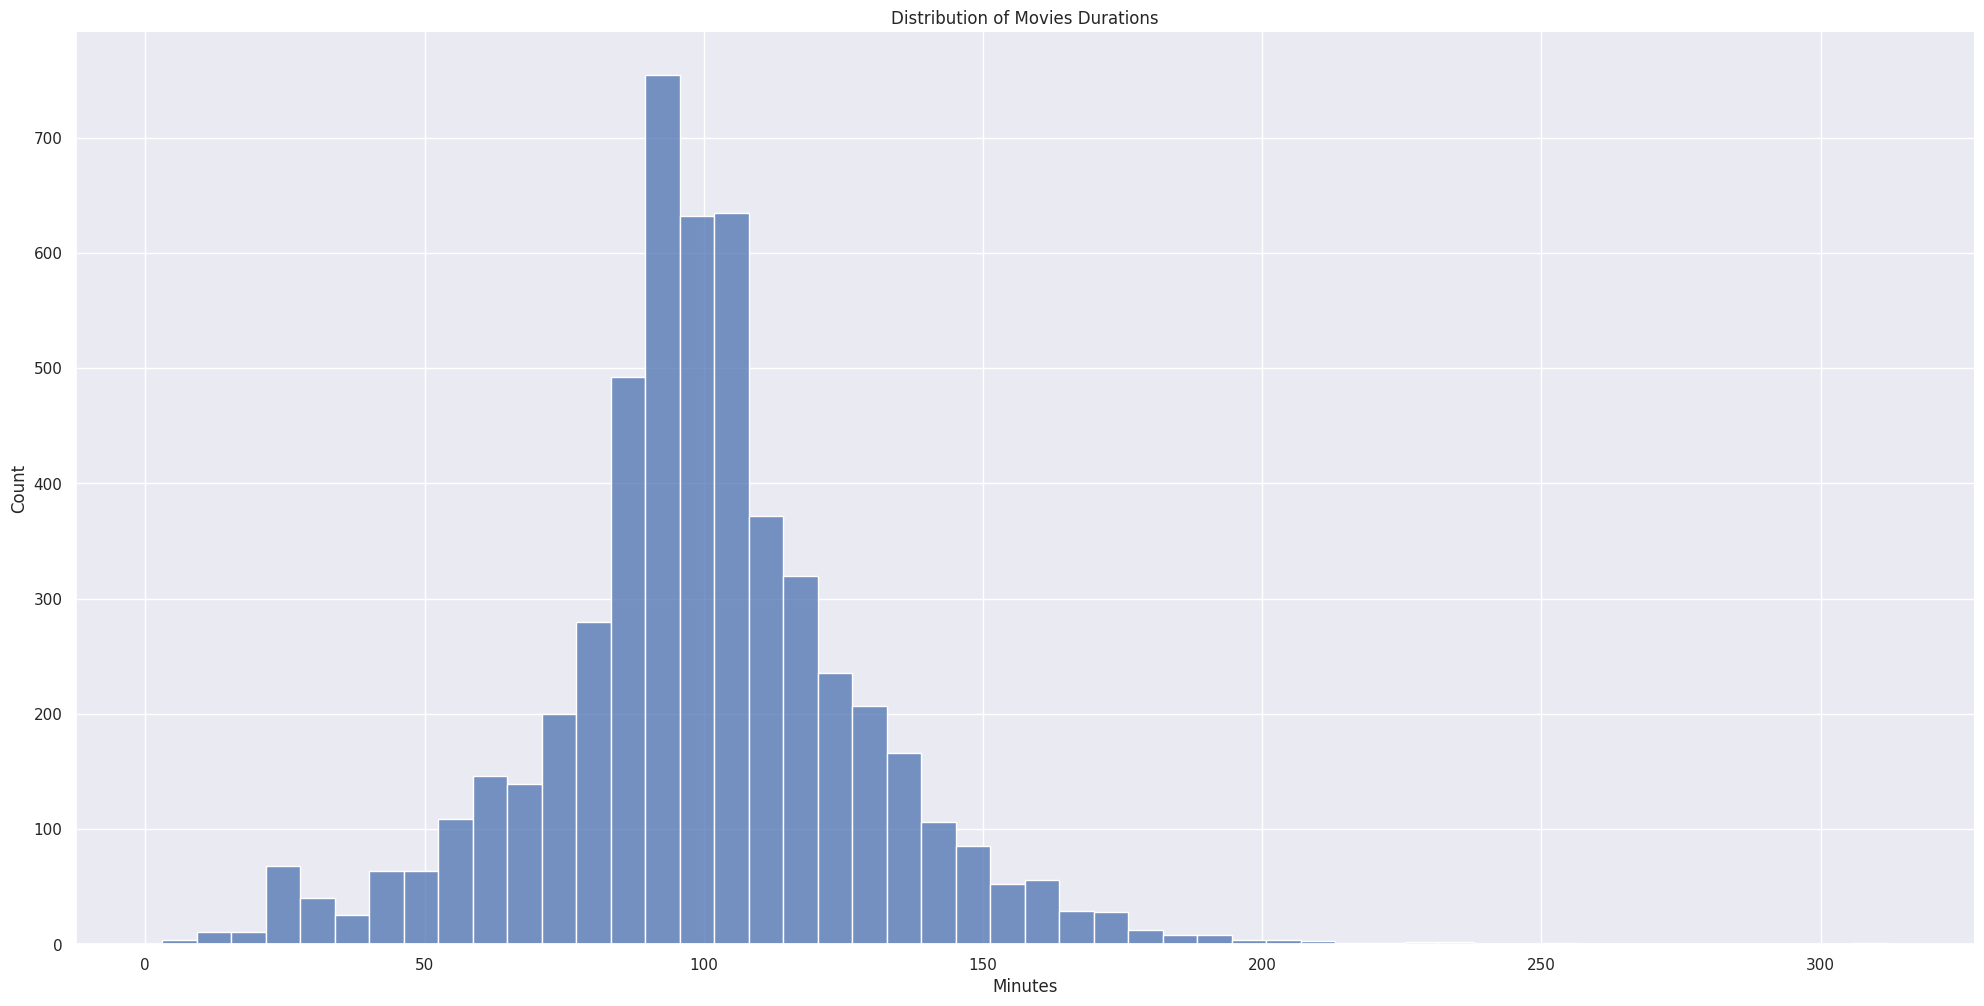

In [36]:
# duration of movies
sns.displot(data= df_copy.duration[df_copy['type']=='Movie'], kind='hist', height=10, aspect=2, bins=50)
plt.xlabel('Minutes')
plt.title('Distribution of Movies Durations')
plt.show();

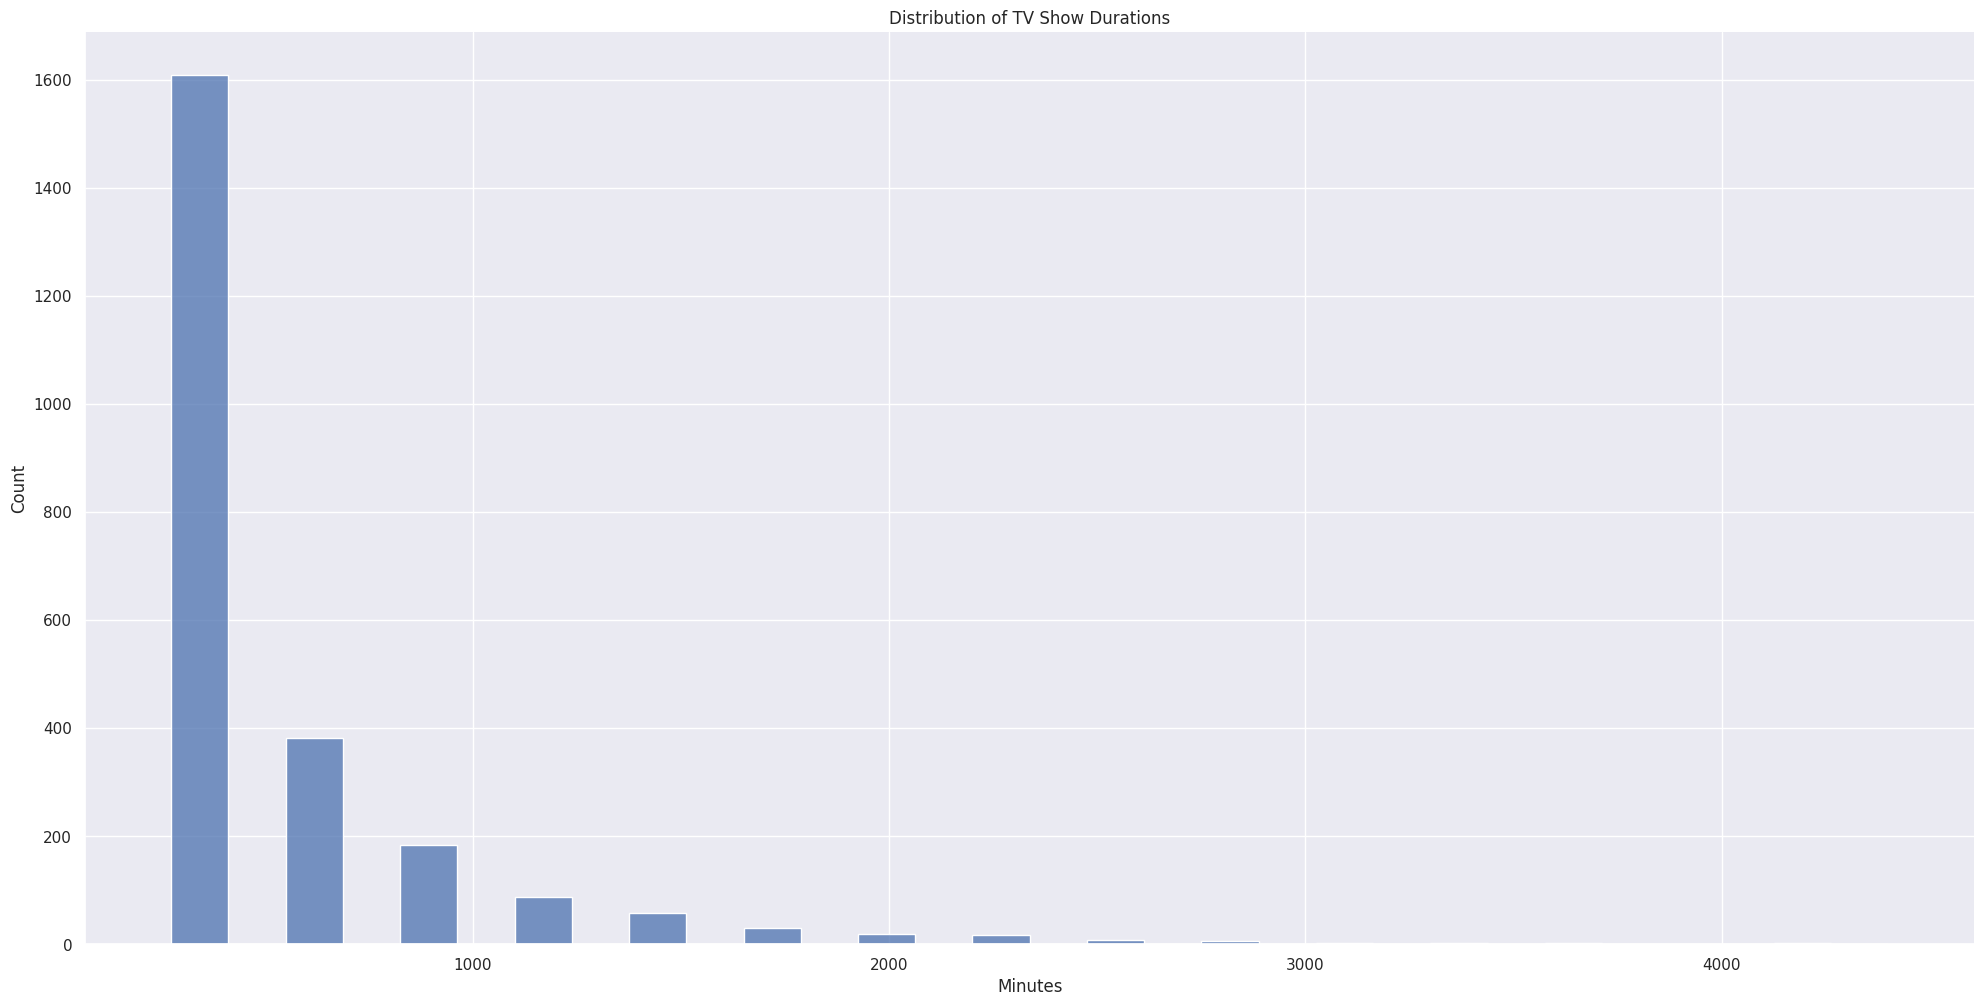

In [37]:
# duration of Tv Shows
sns.displot(data= df_copy.duration[df_copy['type']=='TV Show'], kind='hist', height=10, aspect=2, bins=30)
plt.xlabel('Minutes')
plt.title('Distribution of TV Show Durations')
plt.show();

In [38]:
# production growth on type and release year

year_movie = df_copy[df_copy.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(10)
year_show = df_copy[df_copy.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(10)
total = df_copy['release_year'].value_counts().sort_index(ascending=False).head(10)

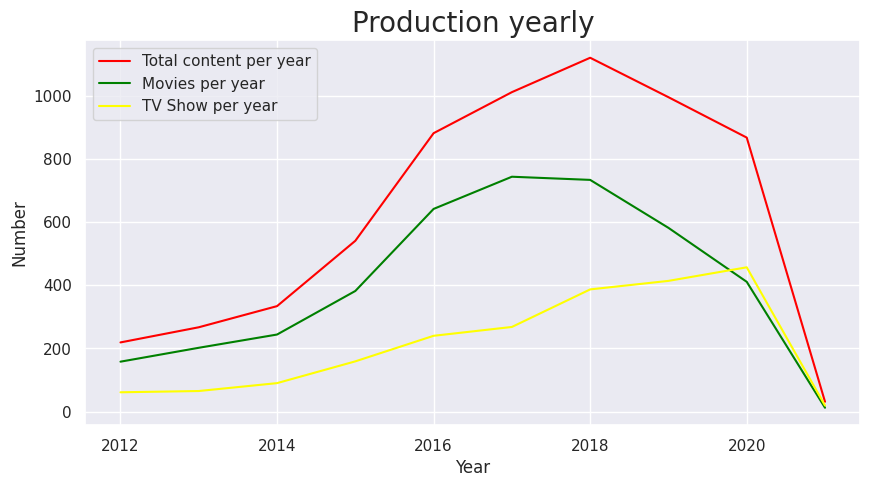

In [39]:
# visualizing the growth of production yearly for type of the content

sns.set(font_scale = 1)
total.plot(figsize=(10,5), linewidth= 1.5, color='red', label='Total content per year')
year_movie.plot(figsize=(10,5), linewidth= 1.5, color='green', label='Movies per year')
year_show.plot(figsize=(10,5), linewidth= 1.5, color='yellow', label='TV Show per year')
plt.xlabel('Year')
plt.ylabel('Number')
plt.legend()
plt.title('Production yearly', fontsize=20)
plt.show();

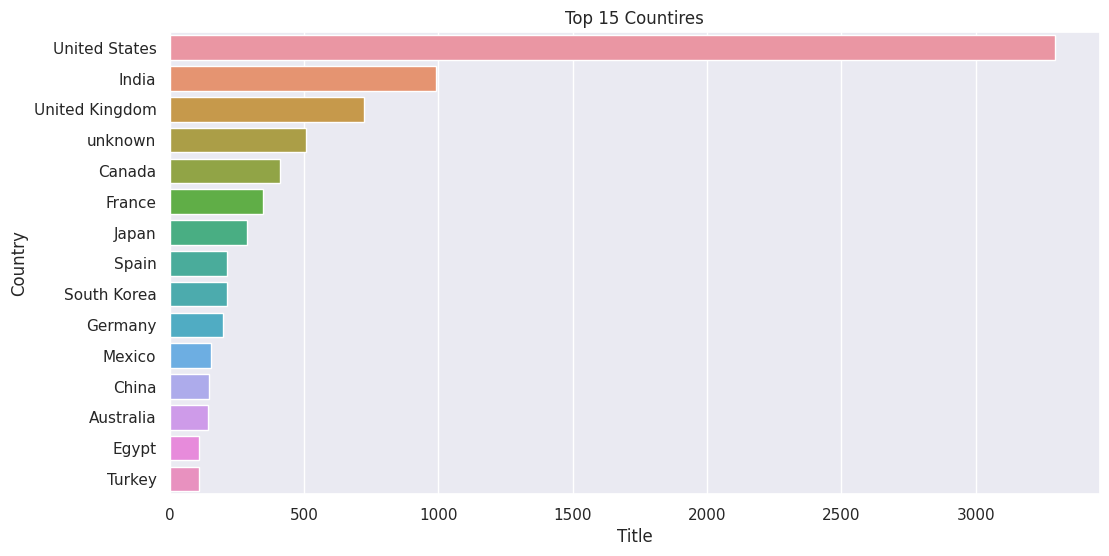

In [40]:
# Countires by the content produce on netflix

countries = df_copy.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
countries = countries[countries != 'Country Unavailable']
plt.figure(figsize=(12,6))
sns.countplot(y=countries, order=countries.value_counts().index[:15])
plt.xlabel('Title')
plt.ylabel('Country')
plt.title('Top 15 Countires')
plt.show();

* From the chart we can see the top 15 countries contributed on netflix and ***United State*** is highest number of content created country on the netflix followed by **India**.

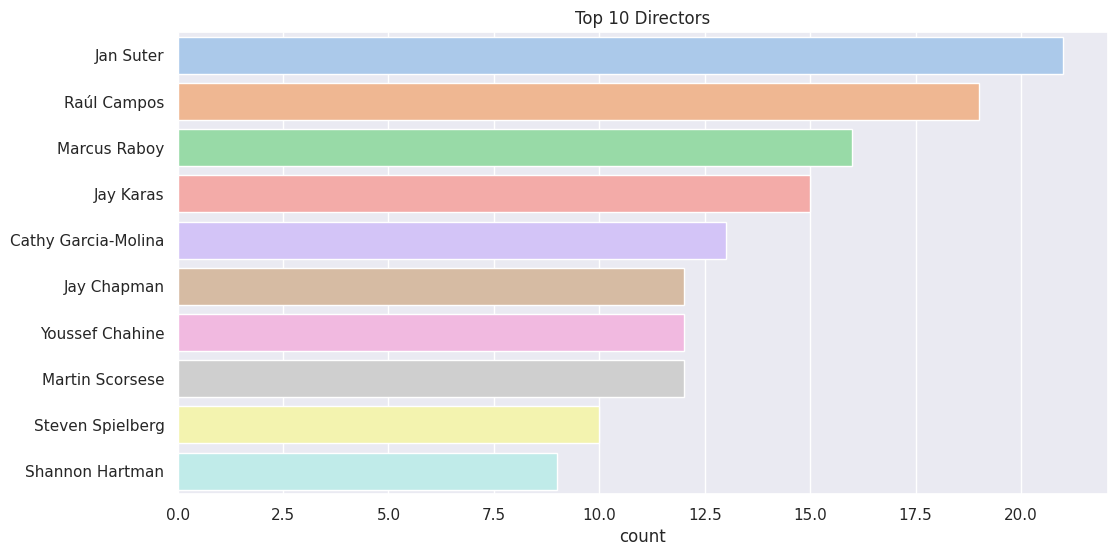

In [41]:
# Top directors or popular directors on netflix

directors = df_copy[df_copy.director != 'unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,6))
sns.countplot(y=directors, order=directors.value_counts().index[:10], palette='pastel')
plt.title('Top 10 Directors')
plt.show();

* We can see that the top 10 directors are on netflix with most no of content are mostly international.
* ***Jan Suter*** is top director with high no of content directed on netflix.

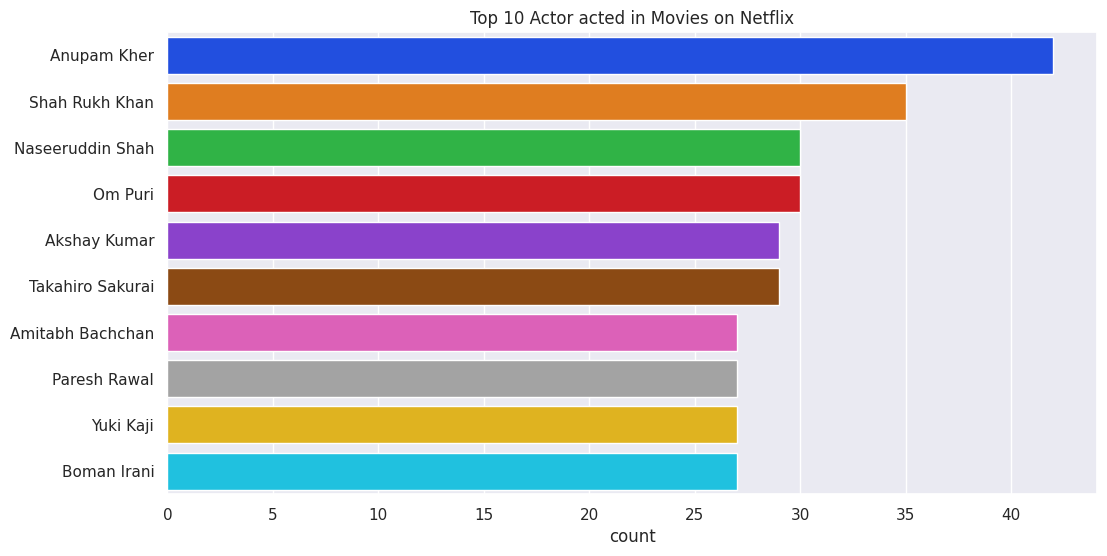

In [42]:
# Top 10 actors in movies based on number movies acted in

cast_movies = df_copy[df_copy.cast != 'unknown'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,6))
sns.countplot(y=cast_movies, order=cast_movies.value_counts().index[:10], palette='bright')
plt.title('Top 10 Actor acted in Movies on Netflix')
plt.show();

* Highest no of actors are ***Indian*** in the top 10 actors acted in movies present on the netflix.
* Top actor who acted highest no of movies is ***Anupam Kher***.

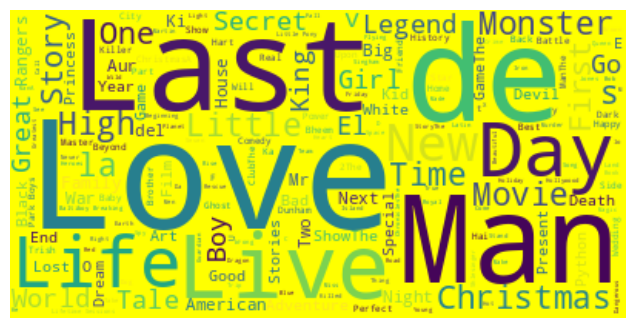

In [50]:
# most occured word in title

word_cloud = df_copy['title']
text = ''. join(word for word in word_cloud)

# stop word list
stopword = set(STOPWORDS)

# word cloud image

word = WordCloud(stopwords= stopword, background_color='Yellow').generate(text)
plt.rcParams['figure.figsize']=(8,4)
plt.imshow(word, interpolation='bilinear')
plt.axis('off')
plt.show()

* It look like words like 'Love', 'Last', 'Man', 'de' are most used in titles.
* there is word 'Christmas' also occured maybe those movies are released on December.

# Data Preparing For NLP

In [66]:
df_copy.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [71]:
df_copy.description.iloc[1]

'devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alive'

In [55]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [57]:
def delete_stopwords(description):
  ''' this function will take the text data
   as input and delete the stopwords from it.'''

  clean_text= [i.lower() for i in description.split() if i.lower() not in stop_words]
  return ' '.join(clean_text)     # join the list of words with space separator

In [58]:
df_copy['description'] = df_copy['description'].apply(delete_stopwords)
df_copy['description'][0:3]

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city, trapp...
2    army recruit found dead, fellow soldiers force...
Name: description, dtype: object

In [59]:
import string

In [62]:

def remove_punct(text):
  ''' this function is used forremoving the
  punctuation marks from text'''

  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
  return text

In [64]:
df_copy['description'] = df_copy['description'].apply(remove_punct)
df_copy['description'][0:3]

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
Name: description, dtype: object

* Now all the descrption data is ***stopwords*** and *punctuations* free

In [73]:
# creating the countvectorizer 

count_vect = CountVectorizer()
count_vect.fit(df['description'])
dictionary = count_vect.vocabulary_.items()
dictionary

dict_items([('in', 8078), ('future', 6598), ('where', 17688), ('the', 16201), ('elite', 5233), ('inhabit', 8220), ('an', 796), ('island', 8486), ('paradise', 11660), ('far', 5915), ('from', 6523), ('crowded', 3884), ('slums', 14878), ('you', 18051), ('get', 6788), ('one', 11307), ('chance', 2790), ('to', 16389), ('join', 8679), ('saved', 14060), ('squalor', 15267), ('after', 528), ('devastating', 4458), ('earthquake', 5091), ('hits', 7624), ('mexico', 10228), ('city', 3041), ('trapped', 16597), ('survivors', 15782), ('all', 667), ('walks', 17501), ('of', 11239), ('life', 9373), ('wait', 17480), ('be', 1595), ('rescued', 13408), ('while', 17694), ('trying', 16730), ('desperately', 4411), ('stay', 15371), ('alive', 666), ('when', 17686), ('army', 1061), ('recruit', 13135), ('is', 8476), ('found', 6408), ('dead', 4135), ('his', 7606), ('fellow', 6020), ('soldiers', 14997), ('are', 1023), ('forced', 6349), ('confront', 3460), ('terrifying', 16147), ('secret', 14244), ('that', 16198), ('hau

In [74]:
vocab = [ ]
count_vocab = []

for key, value in dictionary:
  vocab.append(key)
  count_vocab.append(value)

In [75]:
vocab_stem = pd.DataFrame({'word': vocab, 'count': count_vocab})

vocab_stem = vocab_stem.sort_values('count', ascending=False)

In [76]:
vocab_stem.head(5)

,word,count
17521,şeref,18167
9974,ōarai,18166
11766,łukasz,18165
10627,über,18164
12574,ömer,18163


In [77]:
vocab_stem.tail(5)

,word,count
705,100,4
1072,10,3
7730,009,2
6709,007,1
1073,000,0


In [85]:
top_vocab = vocab_stem.head(15)

In [86]:
top_words = top_vocab.word.values
top_words

array(['şeref', 'ōarai', 'łukasz', 'über', 'ömer', 'émile', 'ángel',
       'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu',
       'zuckerberg'], dtype=object)

In [88]:
top_words_count = top_vocab['count'].values
top_words_count

array([18167, 18166, 18165, 18164, 18163, 18162, 18161, 18160, 18159,
       18158, 18157, 18156, 18155, 18154, 18153])

(18150.0, 18170.0)

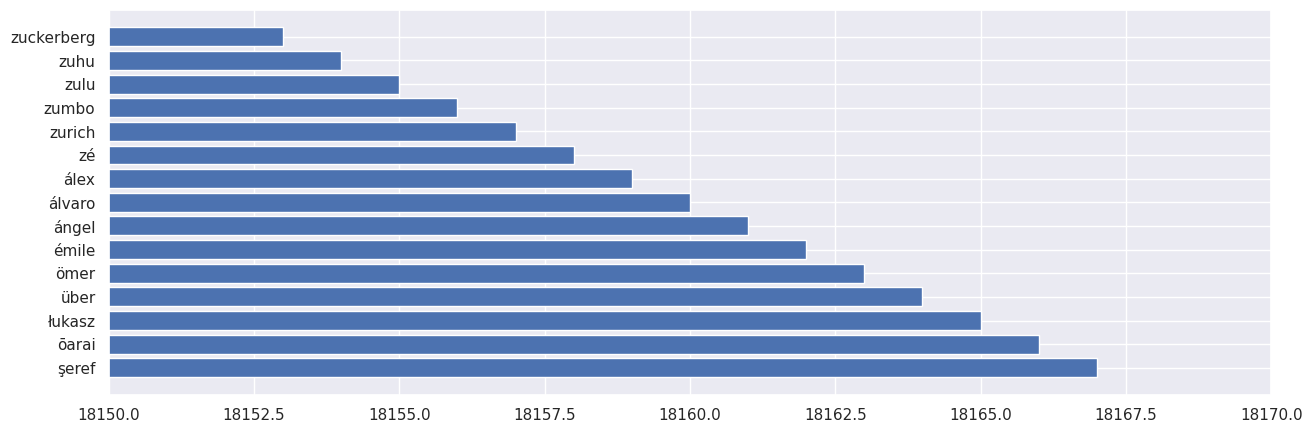

In [91]:
plt.figure(figsize=(15,5))
plt.barh(top_words, top_words_count)
plt.xlim(18150, 18170)
plt.show()

In [92]:
# SnowballStemmer

# creating stemming function
stemmer = SnowballStemmer('english')

In [93]:
def stemming(text):
  '''function for each words stem in text'''
  text = [stemmer.stem(word) for word in text.split()]
  return ' '.join(text)

In [94]:
df_copy['description'] = df_copy['description'].apply(stemming)
df_copy['description'][0:4]

0    futur elit inhabit island paradis far crowd sl...
1    devast earthquak hit mexico citi trap survivor...
2    armi recruit found dead fellow soldier forc co...
3    postapocalypt world ragdol robot hide fear dan...
Name: description, dtype: object

In [105]:
# TfidfVectorizer

# creating the object for Tfid Vectorizer
tfid_vect = TfidfVectorizer()
tfid_vect.fit(df_copy['description'])
dictionary = tfid_vect.vocabulary_.items()

In [106]:
vocab = [ ]
count_vocab = []

for key, value in dictionary:
  vocab.append(key)
  count_vocab.append(value)

In [107]:
vocab_after_stem = pd.DataFrame({'word': vocab, 'count': count_vocab})

vocab_after_stem = vocab_after_stem.sort_values('count', ascending=False)

In [108]:
top_voacb_after = vocab_after_stem.head(15)

In [109]:
top_words_after = top_voacb_after.word.values
top_words_after

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [110]:
top_words_count_after = top_voacb_after['count'].values
top_words_count_after

array([14292, 14291, 14290, 14289, 14288, 14287, 14286, 14285, 14284,
       14283, 14282, 14281, 14280, 14279, 14278])

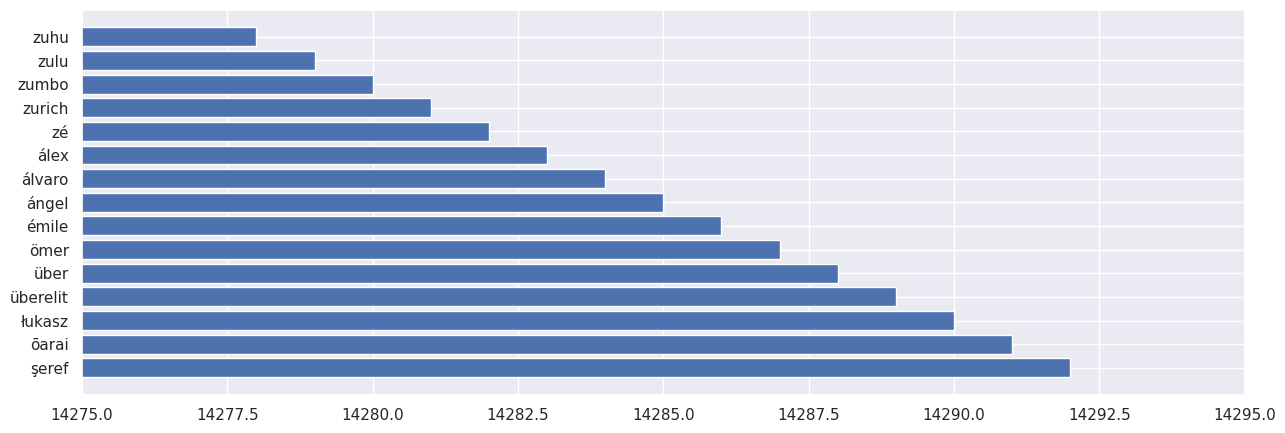

In [112]:
plt.figure(figsize=(15,5))
plt.barh(top_words_after, top_words_count_after)
plt.xlim(14275, 14295)
plt.show()